In [13]:

import os

os.environ['PYTHONPATH']= '/home/boese/projects/ml-pipe-services/ml-pipe-services'
os.environ['ACSS_CONFIG_FILEPATH'] = '/home/boese/projects/ml-pipe-services/ml-pipe-config.yaml'
os.environ['PATH_TO_ACSS_SERVICES_ROOT'] = '/home/boese/projects/ml-pipe-services'

from acss_core.client.utils import get_services

IS_SIM = False

In [22]:
agts, sims = get_services()
print(agts)
print(sims)

{'ConfigToFileService': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3ef1c760>, 'Observer': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3c5ba7f0>, 'OrbitAgent': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3f0be940>, 'OrbitCorrAgent': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3f0be070>, 'MachineService': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3f0be100>, 'SetTableService': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3f0beca0>, 'SillyAgent': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3c63e9d0>, 'SillyMeasureAgent': <ml_pipe_core.client.service_client.AgentClient object at 0x7f7e3c63ecd0>}
{'PetraOrbitSimulation': <ml_pipe_core.client.service_client.MachineClient object at 0x7f7e3f0be1f0>}


In [15]:
import numpy as np
def plot_orbit(adapter):
    plt.rcParams['figure.figsize'] = [20, 10]
    x, y, bpm_names = petra.get_bpms()
    plt.stem(x, linefmt='blue', markerfmt=".")
    plt.stem(y, linefmt='green', markerfmt=".")
    plt.grid()
    plt.show()

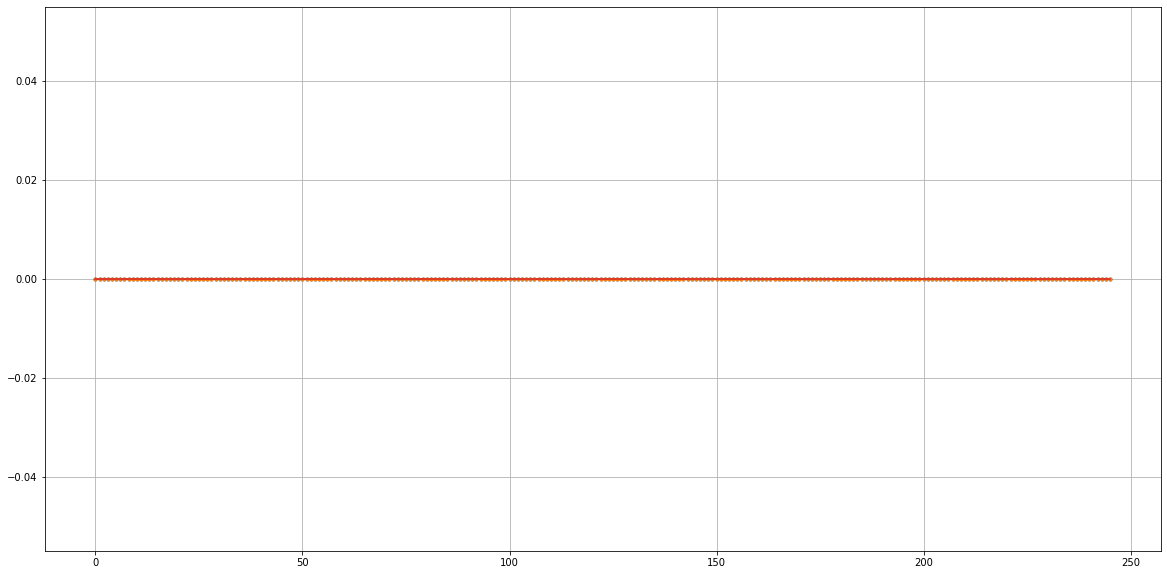

In [18]:

plot_orbit(petra)

In [17]:
# get corrector settings, plot
from adapter.petra.PetraMachineAdapter import PetraMachineAdapter
import numpy as np
import matplotlib.pyplot as plt



petra = PetraMachineAdapter.create_for_simulation()

# get corretors

hcor_names = petra.get_hcor_device_names()
hcors = petra.get_hcors(hcor_names)

vcor_names = petra.get_vcor_device_names()
vcors = petra.get_vcors(vcor_names)



[2022-05-19 17:26:23.999] DEBUG  Constants loaded: length 246
read PeCorH: 210 values
names: len 210 curr len 210
read PeCorV: 194 values
names: len 194 curr len 194


In [5]:
import pickle

def load_data(file_path):
    with open(file_path, 'rb') as fs:
        return pickle.load(fs)

vcor_names = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-vcor-names-3-5-22')
vcor_strengths = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-vcor-strengths-3-5-22')
vcor_currents = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-vcor-currents-3-5-22')
vcors_n_cur = {name: val for name, val in zip(vcor_names, vcor_currents)}
vcors_n_str = {name: val for name, val in zip(vcor_names, vcor_strengths)}

hcor_names = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-hcor-names-3-5-22')
hcor_strengths = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-hcor-strengths-3-5-22')
hcor_currents = load_data('/home/boese/projects/ml-pipe-services/adapter/petra/config/sim-data/all-hcor-currents-3-5-22')
hcors_n_cur = {name: val for name, val in zip(hcor_names, hcor_currents)}
hcors_n_str = {name: val for name, val in zip(hcor_names, hcor_strengths)}

In [6]:

cor_name = 'PCH_SWR_9'
print(f"current: {hcors_n_cur[cor_name]}")
print(f"strengths: {hcors_n_str[cor_name]}")


current: 0.039653852581977844
strengths: 2.5016592189786024e-05


In [7]:

np.random.uniform(min(hcor_strengths), max(hcor_strengths))

0.000501347239511154

In [ ]:
vcor_strengths

In [ ]:
hcor_strengths

[2022-05-19 14:17:16.045] DEBUG  service name = PetraOrbitSimulation


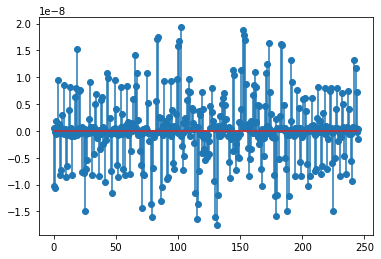

In [19]:
from acss_core.adapter.MsgBusWriter import MessageBusWriter

writer = MessageBusWriter('console', is_sync=True, simulations=['PetraOrbitSimulation'])
writer("/PETRA/Cms.PsGroup", "CORS", "Strength.Random", input=(0, 0))
writer.commit()
plot_orbit(petra)

[2022-05-10 11:01:22.768] DEBUG  service name = PetraOrbitSimulation


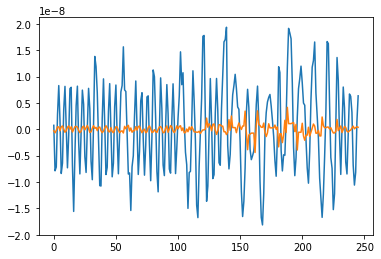

In [18]:
from acss_core.adapter.MsgBusWriter import MessageBusWriter

writer = MessageBusWriter('console', is_sync=True, simulations=['PetraOrbitSimulation'])
writer("/PETRA/Cms.PsGroup", "CORS", "Strength.Random", input=(0, 10))
writer.commit()
plot_orbit(petra)

[2022-05-19 17:34:14.163] DEBUG  service name = SetTableService
[2022-05-19 17:34:18.782] DEBUG  service name = PetraOrbitSimulation


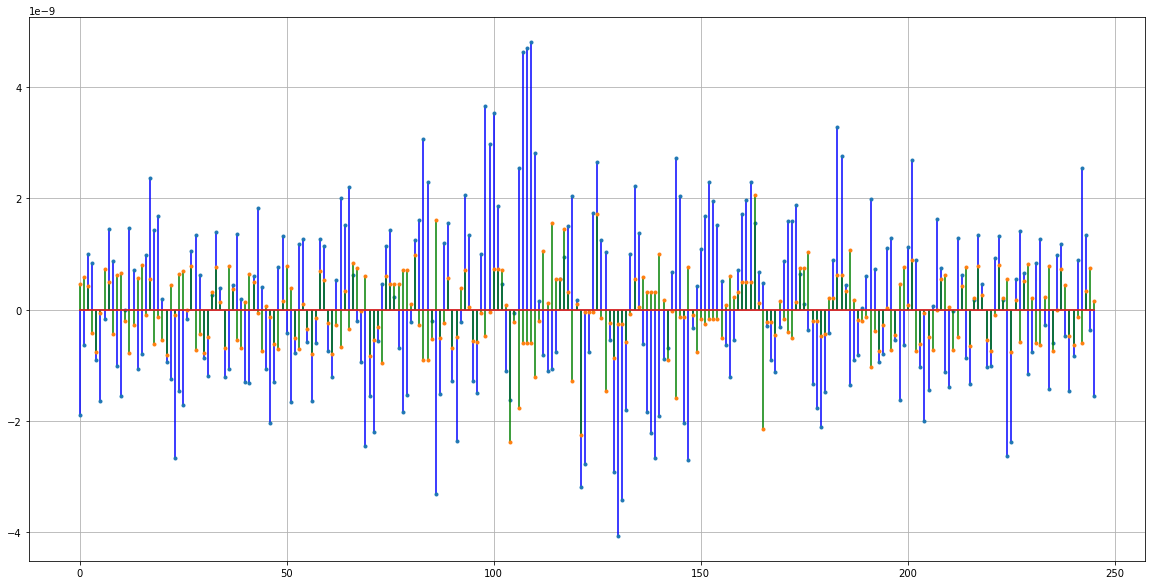

In [29]:
# set correctors random

agts['SetTableService'].run(params={'data':[{'names': hcor_names, 'values': [np.random.rand()*1e-4 for _ in hcor_names], 'type': 'hcor'}, 
                                        {'names': vcor_names, 'values': [np.random.rand()*1e-4 for _ in vcor_names], 'type': 'vcor'}]}, 
                            wait_for_sims=['PetraOrbitSimulation'])
plot_orbit(petra)

In [11]:
petra.get_hcor_device_names()

['PCH_SWR_9',
 'PKDK_SWR_27',
 'PKDK_SWR_43',
 'PKDK_SWR_50',
 'PKDK_SWR_64',
 'PKDK_SWR_79',
 'PKDK_SWR_93',
 'PKDK_SWR_108',
 'PKDK_SWR_122',
 'PKDK_WL_151',
 'PKDK_WL_136',
 'PKDK_WL_122',
 'PKDK_WL_108',
 'PKDK_WL_93',
 'PKDK_WL_79',
 'PKDK_WL_64',
 'PKDK_WL_49',
 'PKHW_WL_31',
 'PKHW_WL_19',
 'PKHW_WL_7',
 'PKHW_WR_5',
 'PKHW_WR_18',
 'PKHW_WR_30',
 'PCH_WR_40',
 'PKDK_WR_49',
 'PKDK_WR_64',
 'PKDK_WR_72',
 'PKDK_WR_86',
 'PKDK_WR_100',
 'PKDK_WR_115',
 'PKDK_WR_129',
 'PKDK_WR_144',
 'PKDK_NWL_129',
 'PKDK_NWL_115',
 'PKDK_NWL_100',
 'PKDK_NWL_86',
 'PKDK_NWL_72',
 'PKDK_NWL_57',
 'PKDK_NWL_43',
 'PKDK_NWL_27',
 'PCH_NWL_9',
 'PCH_NWR_9',
 'PKDK_NWR_27',
 'PKDK_NWR_43',
 'PKDK_NWR_50',
 'PKDK_NWR_64',
 'PKDK_NWR_79',
 'PKDK_NWR_93',
 'PKDK_NWR_108',
 'PKDK_NWR_122',
 'PKDK_NL_151',
 'PKDK_NL_136',
 'PKDK_NL_122',
 'PKDK_NL_108',
 'PKDK_NL_93',
 'PKDK_NL_79',
 'PKDK_NL_64',
 'PKDK_NL_49',
 'PKHW_NL_31',
 'PKHW_NL_19',
 'PKHW_NL_7',
 'PKHW_NR_5',
 'PKHW_NR_18',
 'PKHW_NR_30',
 'PCH

In [12]:
petra.get_hcors(petra.get_hcor_device_names())

read PeCorH: 210 values
names: len 210 curr len 210


[3.33611e-05,
 9.59648e-05,
 4.66779e-05,
 7.50625e-05,
 9.66752e-05,
 8.24176e-05,
 1.41907e-05,
 8.41488e-05,
 1.27234e-05,
 1.03579e-05,
 9.38512e-05,
 2.82081e-05,
 7.53264e-05,
 2.29374e-05,
 8.22513e-05,
 4.78793e-05,
 7.20496e-05,
 6.26257e-05,
 8.46933e-05,
 2.59395e-05,
 8.48837e-05,
 4.05911e-06,
 1.17173e-06,
 6.14075e-05,
 6.69586e-06,
 6.76146e-05,
 2.54995e-05,
 5.24593e-05,
 9.79622e-05,
 1.83828e-05,
 9.4257e-05,
 3.11541e-06,
 8.20595e-05,
 8.46564e-05,
 2.52015e-06,
 8.51974e-05,
 7.71644e-07,
 2.91186e-05,
 3.75034e-05,
 2.51478e-05,
 2.94674e-05,
 3.01001e-05,
 1.42731e-05,
 7.87457e-05,
 5.14296e-05,
 1.12643e-05,
 5.13519e-05,
 9.85587e-06,
 2.34874e-05,
 7.88244e-05,
 5.22467e-05,
 6.05454e-05,
 2.05297e-05,
 9.83038e-06,
 2.92078e-05,
 9.81021e-05,
 1.68411e-05,
 4.18163e-05,
 8.52652e-05,
 6.48848e-05,
 6.81466e-05,
 5.06341e-05,
 2.26101e-05,
 9.74269e-05,
 5.52177e-07,
 4.81854e-05,
 8.72962e-05,
 2.13264e-05,
 8.35605e-05,
 4.77911e-05,
 4.68335e-05,
 4.7653

In [ ]:
petra.get_vcor_device_names()

In [ ]:
petra.get_vcors(petra.get_vcor_device_names())

In [ ]:
plot_orbit(petra)
#('PCH_SWR_9', -0.000604669)

Before:


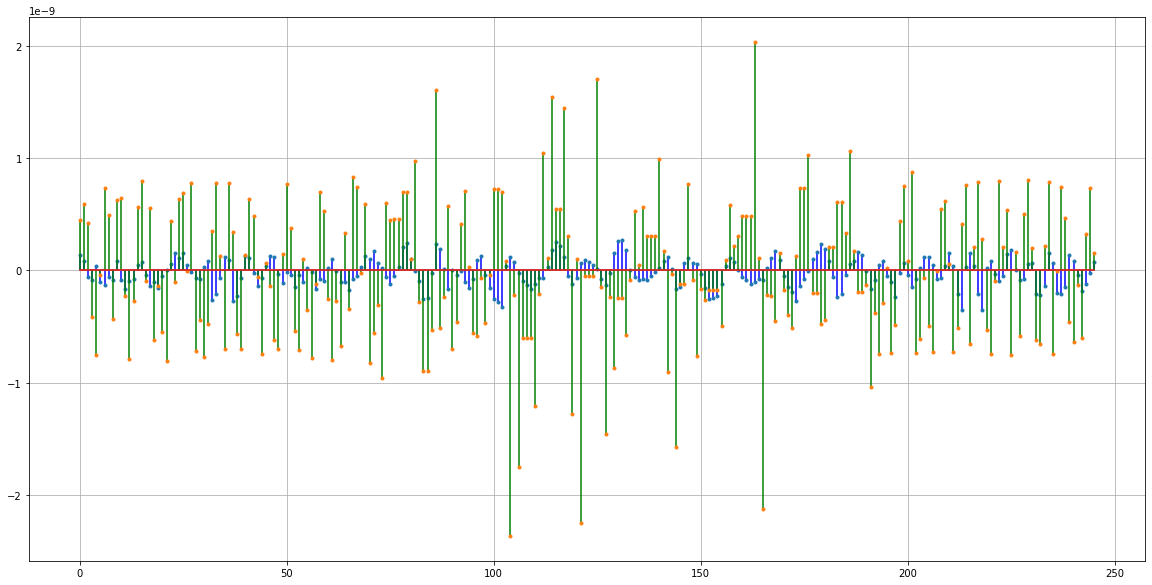

[2022-05-19 17:37:13.859] DEBUG  service name = OrbitCorrAgent
[2022-05-19 17:37:22.598] DEBUG  service name = OrbitCorrAgent
[2022-05-19 17:37:28.808] DEBUG  service name = PetraOrbitSimulation
None
After:


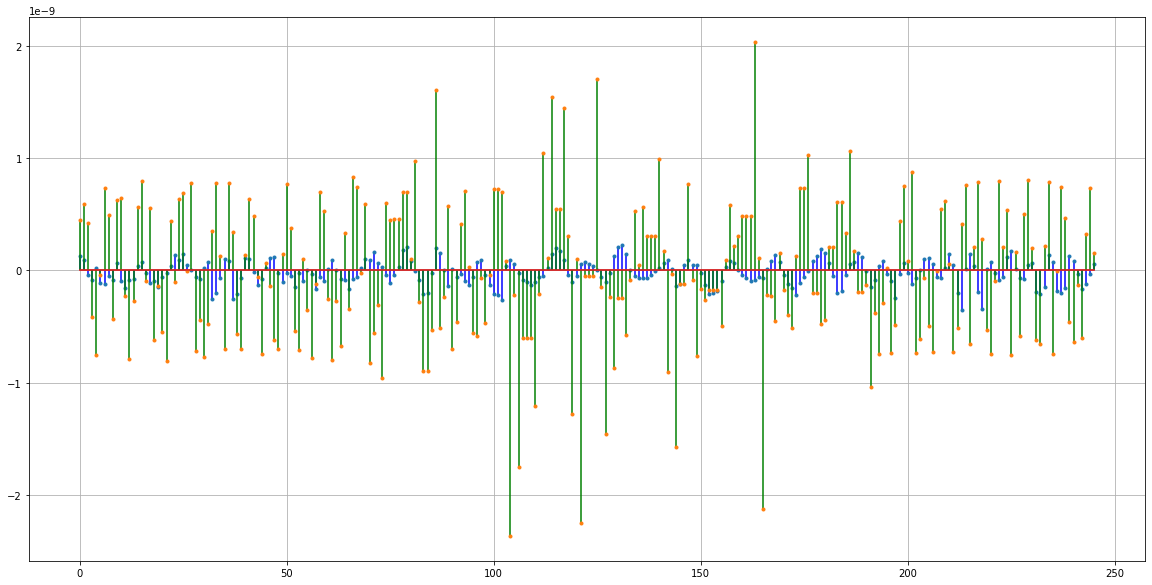

{'PKH_NOR_81': 3.9966065035107206e-05, 'PKDK_SL_151': 4.872013647486253e-05, 'PKPDD_NR_87': 3.32526138478118e-05, 'PKDK_NWR_122': -4.211304611219665e-06, 'PKDK_SL_122': 8.918294100353355e-05, 'PCH_NOL_7': 0.0001318397348718779, 'PCH_OR_25': 4.820584827751888e-06, 'PKDK_SWR_93': 0.00011876715670996335, 'PKHW_WR_18': 6.595520655239398e-05, 'PKDK_WL_151': -6.17650908241912e-06, 'PKDK_NOL_43': 0.00011783894277986858, 'PKDK_SOR_122': 4.2138744210068905e-05, 'PKDK_WL_122': 0.00013874279226295825, 'PKH_OR_64': 0.00012783770994993028, 'PKPDA_NOR_37': 3.119331666941521e-05, 'PKDK_SWL_115': 4.732999688114629e-05, 'PCH_OR_15': 9.063190307837263e-05, 'PKH_OL_103': 8.58542999217419e-05, 'PCH_NOR_32': 2.794849965527062e-05, 'PKH_NR_64': 2.850559511294364e-05, 'PKDK_NWL_129': 4.877092361027176e-05, 'PKH_NOR_104': 1.2905235565002176e-05, 'PKH_OL_126': 9.675558306172906e-05, 'PCH_SOR_7': 6.642674145546231e-05, 'PKPDA_NOR_45': 0.00011106263732604117, 'PKDK_SOL_57': 3.0147109416067804e-06, 'PKH_NOR_86': 

%6|1652974755.670|FAIL|rdkafka#producer-3| [thrd:localhost:9096/2]: localhost:9096/2: Disconnected (after 674280ms in state UP)
%6|1652974755.670|FAIL|rdkafka#producer-3| [thrd:localhost:9096/2]: localhost:9096/2: Disconnected while requesting ApiVersion: might be caused by incorrect security.protocol configuration (connecting to a SSL listener?) or broker version is < 0.10 (see api.version.request) (after 0ms in state APIVERSION_QUERY)
%6|1652974755.685|FAIL|rdkafka#producer-3| [thrd:localhost:9094/bootstrap]: localhost:9094/1: Disconnected (after 682643ms in state UP)
%6|1652974755.685|FAIL|rdkafka#producer-3| [thrd:localhost:9096/2]: localhost:9096/2: Disconnected while requesting ApiVersion: might be caused by incorrect security.protocol configuration (connecting to a SSL listener?) or broker version is < 0.10 (see api.version.request) (after 0ms in state APIVERSION_QUERY, 1 identical error(s) suppressed)
%6|1652974755.685|FAIL|rdkafka#producer-3| [thrd:localhost:9094/bootstrap]: l

In [35]:
# get orbit, , plot
print("Before:")
plot_orbit(petra)

agts['OrbitCorrAgent'].reconfig({'x_factor': 1000000.0, 'y_factor': 0.0, 'n_sv_x':200, 'n_sv_y':200}, sync=True)
# correct orbit
for _ in range(1):
    print(agts['OrbitCorrAgent'].run(wait_for_sims=['PetraOrbitSimulation']))

    res = agts['OrbitCorrAgent'].get_result()
# get orbot, plot
print("After:")
plot_orbit(petra)

agt_hcor = { name: val for name, val in zip(res.result['hcor'],res.result['hcor_val'])}
agt_vcor = { name: val for name, val in zip(res.result['vcor'],res.result['vcor_val'])}
print(agt_hcor)
print(agt_vcor) 

In [27]:
{n: v for n, v in zip(petra.get_hcor_device_names(), petra.get_hcors(petra.get_hcor_device_names()))}['PCH_SWR_9']

read PeCorH: 210 values
names: len 210 curr len 210


-0.000527789

In [15]:
agt_vcor['PCH_SWR_9']

KeyError: 'PCH_SWR_9'

In [ ]:
agt_hcor

In [ ]:

agts['OrbitCorrAgent'].run(wait_for_sims=['PetraOrbitSimulation'])

In [ ]:
[name for name in hcor_names if name.startswith('PKPPD') or name.startswith('PKPDD')]
[name for name in vcor_names if name.startswith('PKPPD') or name.startswith('PKPDD')]

In [ ]:
# set correctors random
if IS_SIM:
    agts['SetTableService'].run(params={'data':[{'names': hcor_names, 'values': [np.random.rand()*1e-4 for _ in hcor_names], 'type': 'hcor'}, 
                                            {'names': vcor_names, 'values': [np.random.rand()*1e-4 for _ in vcor_names], 'type': 'vcor'}]}, 
                                wait_for_sims=['PetraOrbitSimulation'])


In [ ]:
agts['OrbitCorrAgent'].reconfig({'x_factor': 0.1, 'y_factor': 0.1, 'n_sv_x':20, 'n_sv_y':20})

In [ ]:
# get orbit, , plot
import numpy as np
import matplotlib.pyplot as plt

from adapter.petra.PetraMachineAdapter import PetraMachineAdapter
from adapter.petra.TineAdapter import TineReader, TineWriter
petra = PetraMachineAdapter(write=TineWriter(), read=TineReader())
plot_orbit(petra)

if IS_SIM:
    # correct orbit
    print(agts['OrbitCorrAgent'].run(wait_for_sims=['PetraOrbitSimulation']))
else:
    print(agts['OrbitCorrAgent'].run())
# get orbot, plot
plot_orbit(petra)


In [ ]:


# get corretors

hcor_names = petra.get_hcor_device_names()
hcors = petra.get_hcors(hcor_names)

vcor_names = petra.get_vcor_device_names()
vcors = petra.get_vcors(vcor_names)

In [ ]:
from adapter.petra.TineAdapter import TineReader
from adapter.petra.PetraMachineAdapter import PetraMachineAdapter
import numpy as np
import matplotlib.pyplot as plt

class WriteMock():
    def __init__(self):
        pass
    def __call__(self, channel, device, _property, **kwargs):
        print(f"channel: {channel}")
        print(f"device: {device}")
        print(f"_property: {_property}")
        print(f"kwargs: {kwargs}")
    
    def commit():
        pass


petra = PetraMachineAdapter(write=WriteMock(), read=TineReader())

In [ ]:
petra.set_hcors(hcor_names,hcors)

In [ ]:
import PyTine as pt
l = ['PCH_SWR_9', 'PKDK_SWR_27', 'PKDK_SWR_43', 'PKDK_SWR_50', 'PKDK_SWR_64', 'PKDK_SWR_79', 'PKDK_SWR_93', 'PKDK_SWR_108', 'PKDK_SWR_122', 'PKDK_WL_151', 'PKDK_WL_136', 'PKDK_WL_122', 'PKDK_WL_108', 'PKDK_WL_93', 'PKDK_WL_79', 'PKDK_WL_64', 'PKDK_WL_49', 'PKHW_WL_31', 'PKHW_WL_19', 'PKHW_WL_7', 'PKHW_WR_5', 'PKHW_WR_18', 'PKHW_WR_30', 'PCH_WR_40', 'PKDK_WR_49', 'PKDK_WR_64', 'PKDK_WR_72', 'PKDK_WR_86', 'PKDK_WR_100', 'PKDK_WR_115', 'PKDK_WR_129', 'PKDK_WR_144', 'PKDK_NWL_129', 'PKDK_NWL_115', 'PKDK_NWL_100', 'PKDK_NWL_86', 'PKDK_NWL_72', 'PKDK_NWL_57', 'PKDK_NWL_43', 'PKDK_NWL_27', 'PCH_NWL_9', 'PCH_NWR_9', 'PKDK_NWR_27', 'PKDK_NWR_43', 'PKDK_NWR_50', 'PKDK_NWR_64', 'PKDK_NWR_79', 'PKDK_NWR_93', 'PKDK_NWR_108', 'PKDK_NWR_122', 'PKDK_NL_151', 'PKDK_NL_136', 'PKDK_NL_122', 'PKDK_NL_108', 'PKDK_NL_93', 'PKDK_NL_79', 'PKDK_NL_64', 'PKDK_NL_49', 'PKHW_NL_31', 'PKHW_NL_19', 'PKHW_NL_7', 'PKHW_NR_5', 'PKHW_NR_18', 'PKHW_NR_30', 'PCH_NR_40', 'PKDK_NR_49', 'PKH_NR_61', 'PKH_NR_64', 'PKPDA_NR_66', 'PKPDA_NR_77', 'PKH_NR_79', 'PKH_NR_81', 'PKH_NR_84', 'PKH_NR_86', 'PKPDD_NR_87', 'PKPDA_NR_99', 'PKH_NR_101', 'PKH_NR_103', 'PKDK_NR_108', 'PKDK_NR_115', 'PKDK_NR_129', 'PKDK_NR_144', 'PKDK_NOL_129', 'PKDK_NOL_115', 'PKDK_NOL_100', 'PKDK_NOL_86', 'PKDK_NOL_72', 'PKDK_NOL_57', 'PKDK_NOL_43', 'PKDK_NOL_27', 'PCH_NOL_7', 'PCH_NOR_9', 'PCH_NOR_24', 'PCH_NOR_32', 'PKPDA_NOR_37', 'PKH_NOR_40', 'PKPDA_NOR_45', 'PKH_NOR_47', 'PKH_NOR_58', 'PKPDA_NOR_60', 'PKH_NOR_63', 'PKPDA_NOR_68', 'PKH_NOR_70', 'PKH_NOR_81', 'PKPDA_NOR_83', 'PKH_NOR_86', 'PKPDA_NOR_91', 'PKH_NOR_93', 'PKH_NOR_104', 'PKPDA_NOR_106', 'PKH_NOR_109', 'PKPDA_NOR_114', 'PKH_NOR_116', 'PKH_NOR_127', 'PKPDA_NOR_129', 'PKH_NOR_132', 'PKPDA_OL_151', 'PKH_OL_149', 'PKH_OL_138', 'PKPDA_OL_136', 'PKH_OL_133', 'PKPDA_OL_128', 'PKH_OL_126', 'PKH_OL_115', 'PKPDA_OL_113', 'PKH_OL_110', 'PKPDA_OL_105', 'PKH_OL_103', 'PKH_OL_92', 'PKPDA_OL_90', 'PKH_OL_87', 'PKPDA_OL_82', 'PKH_OL_80', 'PKH_OL_69', 'PKPDA_OL_67', 'PKH_OL_64', 'PKPDA_OL_59', 'PCH_OL_55', 'PCH_OL_41', 'PCH_OL_32', 'PCH_OL_19', 'PCH_OL_7', 'PCH_OR_15', 'PCH_OR_25', 'PCH_OR_29', 'PCH_OR_44', 'PKDK_OR_49', 'PKH_OR_61', 'PKH_OR_64', 'PKPDA_OR_66', 'PKPDA_OR_77', 'PKH_OR_79', 'PKH_OR_81', 'PKH_OR_84', 'PKH_OR_86', 'PKPDD_OR_87', 'PKPDA_OR_99', 'PKH_OR_101', 'PKH_OR_103', 'PKDK_OR_108', 'PKDK_OR_115', 'PKDK_OR_129', 'PKDK_OR_144', 'PKDK_SOL_129', 'PKDK_SOL_115', 'PKDK_SOL_100', 'PKDK_SOL_86', 'PKDK_SOL_72', 'PKDK_SOL_57', 'PKDK_SOL_43', 'PKDK_SOL_27', 'PCH_SOL_7', 'PCH_SOR_7', 'PKDK_SOR_27', 'PKDK_SOR_43', 'PKDK_SOR_50', 'PKDK_SOR_64', 'PKDK_SOR_79', 'PKDK_SOR_93', 'PKDK_SOR_108', 'PKDK_SOR_122', 'PKDK_SL_151', 'PKDK_SL_136', 'PKDK_SL_122', 'PKDK_SL_108', 'PKDK_SL_93', 'PKDK_SL_79', 'PKDK_SL_64', 'PKDK_SL_49', 'PCH_SL_30', 'PCH_SL_5', 'PCH_SR_5', 'PCH_SR_30', 'PKDK_SR_49', 'PKDK_SR_64', 'PKDK_SR_72', 'PKDK_SR_86', 'PKDK_SR_100', 'PKDK_SR_115', 'PKDK_SR_129', 'PKDK_SR_144', 'PKDK_SWL_129', 'PKDK_SWL_115', 'PKDK_SWL_100', 'PKDK_SWL_86', 'PKDK_SWL_72', 'PKDK_SWL_57', 'PKDK_SWL_43', 'PKDK_SWL_27', 'PCH_SWL_9']
pt.get('/PETRA/Cms.PsGroup/PeCorH', 'GroupDevices', size=len(l))['data']